3
(array([], dtype=int64),)


c:\Users\Tim-K\miniconda3\envs\expra\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


Results.Fit:  [6.06732071e+00 1.02854588e+00 4.04104591e-08 1.02637500e-01
 8.31332953e-05]
Results.conf_Intervals:  [[[5.90744953e+00 5.93906453e+00 5.99173763e+00]
  [6.15511750e+00 6.13298465e+00 6.09789635e+00]]

 [[6.47000087e-01 7.13365173e-01 8.58322579e-01]
  [1.67298207e+00 1.55758433e+00 1.34757281e+00]]

 [[5.39554044e-04 1.07910809e-03 3.45314588e-03]
  [6.98746298e-02 5.76937489e-02 3.54144449e-02]]

 [[1.64670085e-02 2.55128004e-02 5.09888717e-02]
  [1.96974611e-01 1.80195406e-01 1.46292752e-01]]

 [[2.90778844e-03 5.81557687e-03 1.90814030e-02]
  [2.61621798e-01 2.25648352e-01 1.58801271e-01]]]


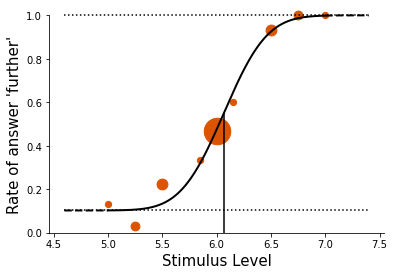

<AxesSubplot:xlabel='Stimulus Level', ylabel="Rate of answer 'further'">

In [38]:
# imports
import numpy as np
import pandas as pd
import psignifit as ps 
import matplotlib.pyplot as plt
import glob
from pathlib import Path

listOfCSVs = []

participant_id = 'Tim' # Name of folder for participant

for i in range(100):
    path = 'C:/Dropbox/Experiment Data/exp2-tim-psychophysics/' + participant_id + f'_{i:03d}/S001/trial_results.csv'
    p = Path(path)
    if p.exists():
        listOfCSVs.append(pd.read_csv(path))

#data_df = pd.read_csv(path) # Read experiment files for participant
print(len(listOfCSVs))
data_df = pd.concat(listOfCSVs, axis=0, ignore_index=True)

target_distances = data_df["stimulusDistance"].unique() # All different stimulus distances 

reference_distance = data_df["referenceDistance"][0] # Reference distance (either 6 or 3)


def getDataAsArray():
    data = []

    for target in target_distances:
        # All rows with target
        table1 = data_df.loc[data_df["targetDist1"] == target]
        table2 = data_df.loc[data_df["targetDist2"] == target]

        nAnswerCloser = 0
        nTotal = 0

        for i in range(len(table1)):
            row = table1.iloc[i]

            if row.get(["answer"][0]) == "right":
                nAnswerCloser += 1

            nTotal += 1

        # Loop through rows with target
        for i in range(len(table2)):

            # Look at one row
            row = table2.iloc[i]

            if row.get(["answer"][0]) == "left":
                nAnswerCloser += 1
            
            nTotal += 1
        
        data.append([target, nAnswerCloser, nTotal]) # Absolute target values

    return np.array(data)
data = getDataAsArray()



options = dict()
options['sigmoidName'] = 'norm'
options['expType'] = 'YesNo'


results = ps.psignifit(data, options) # Get results

print(f"Results.Fit: ", results['Fit'])
print(f"Results.conf_Intervals: ", results['conf_Intervals'])

red = [220./255, 83./255, 0]
ps.psigniplot.plotPsych(results, yLabel="Rate of answer 'further'", dataColor=red) # Plot results